In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the uploaded dataset
data = pd.read_csv('wearable_health_devices_performance_upto_26june2025.csv')

In [ ]:
# Check the first few rows
data.head()

,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3
3,2025-06-01,Polar Vantage V3,Polar,Vantage V3,Smartwatch,349.53,69.4,96.77,95.56,78.06,IP68,8.0,3.2,"WiFi, Bluetooth, NFC, LTE",12,Cross-platform,61.0
4,2025-06-01,Samsung Galaxy Watch FE,Samsung,Galaxy Watch FE,Smartwatch,502.43,39.7,92.27,98.15,75.23,IPX8,8.3,1.6,"WiFi, Bluetooth, NFC, LTE",14,Android/iOS,61.2


In [ ]:
data.shape

(2375, 17)

In [ ]:
# Check Null Values
data.isnull().values.any()

np.True_

In [ ]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 632 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
len(data.columns)

17

In [ ]:
data.dtypes

,0
Test_Date,object
Device_Name,object
Brand,object
Model,object
Category,object
Price_USD,float64
Battery_Life_Hours,float64
Heart_Rate_Accuracy_Percent,float64
Step_Count_Accuracy_Percent,float64
Sleep_Tracking_Accuracy_Percent,float64


In [ ]:
data.describe()

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,1743.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.247676,8.912842,64.047621
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,1.022825,3.559990,5.109075
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.400000,6.000000,60.400000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.200000,9.000000,62.200000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,4.100000,12.000000,67.700000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000


Step 01 : EDA

In [ ]:
# Defining numerical columns
numerical_columns = ['Price_USD', 'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent',
                     'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent',
                     'User_Satisfaction_Rating', 'GPS_Accuracy_Meters', 'Health_Sensors_Count',
                     'Performance_Score']


Observing Histograms (Numerical data)

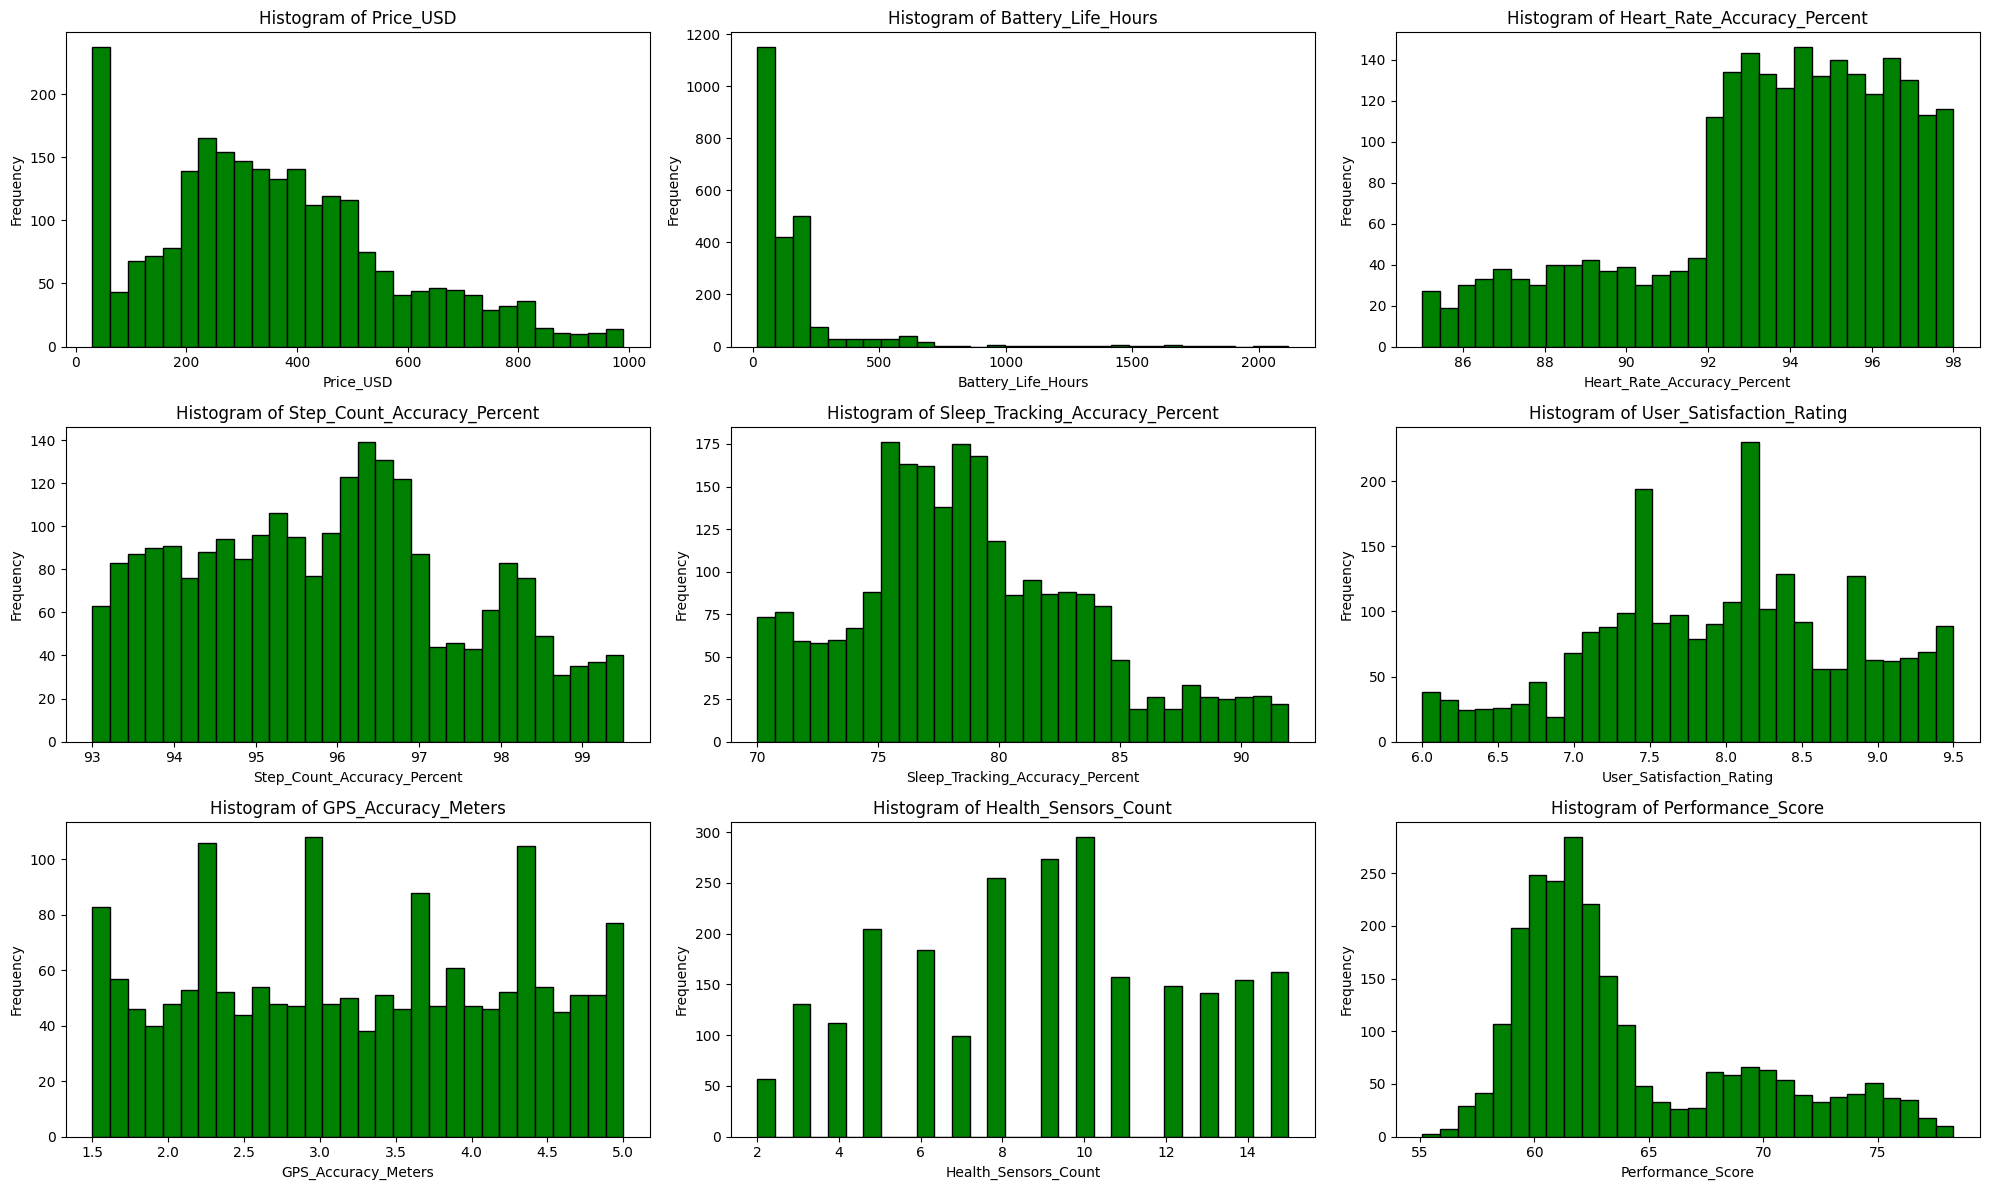

In [ ]:
# Create a grid for the plots (adjust rows/columns based on number of columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numerical columns and plot histograms
for i, column in enumerate(numerical_columns):
    axes[i].hist(data[column], bins=30, color='green', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Defining categorical columns
categorical_columns = ['Device_Name', 'Brand', 'Category', 'Water_Resistance_Rating',
                       'App_Ecosystem_Support', 'Connectivity_Features']


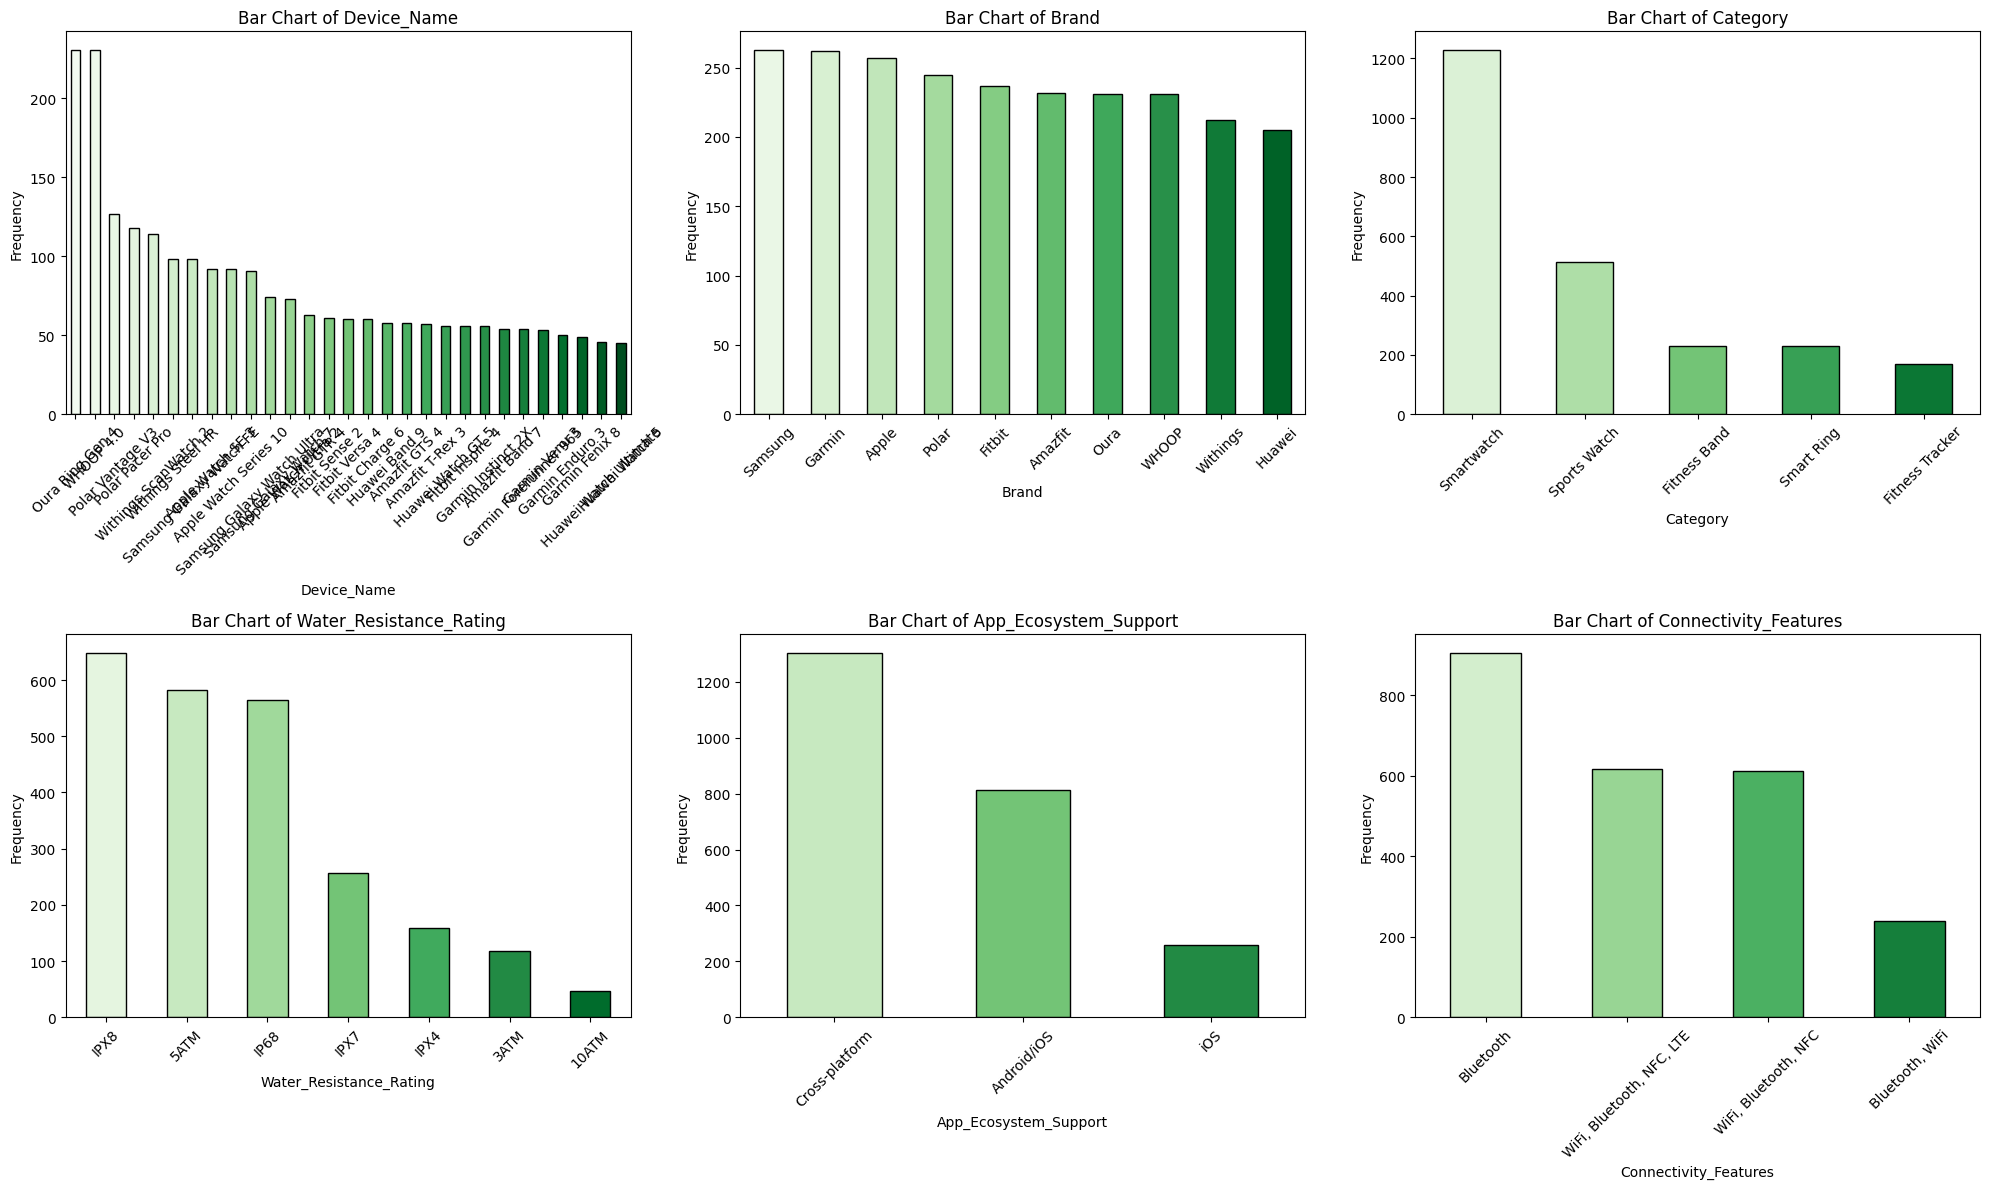

In [ ]:
# Creating a 2x3 grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()
# Looping through categorical columns and plotting the value counts as bar charts
for i, column in enumerate(categorical_columns):
    counts = data[column].value_counts()  # Get value counts
    colors = sns.color_palette('Greens', len(counts))  # Color palette for each bar chart
    counts.plot(kind='bar', ax=axes[i], color=colors, edgecolor='black')  # Plotting the bar chart
    axes[i].set_title(f'Bar Chart of {column}')  # Title for each chart
    axes[i].set_xlabel(column)  # X-axis label
    axes[i].set_ylabel('Frequency')  # Y-axis label

    # Optional: Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


Checking for Outliers

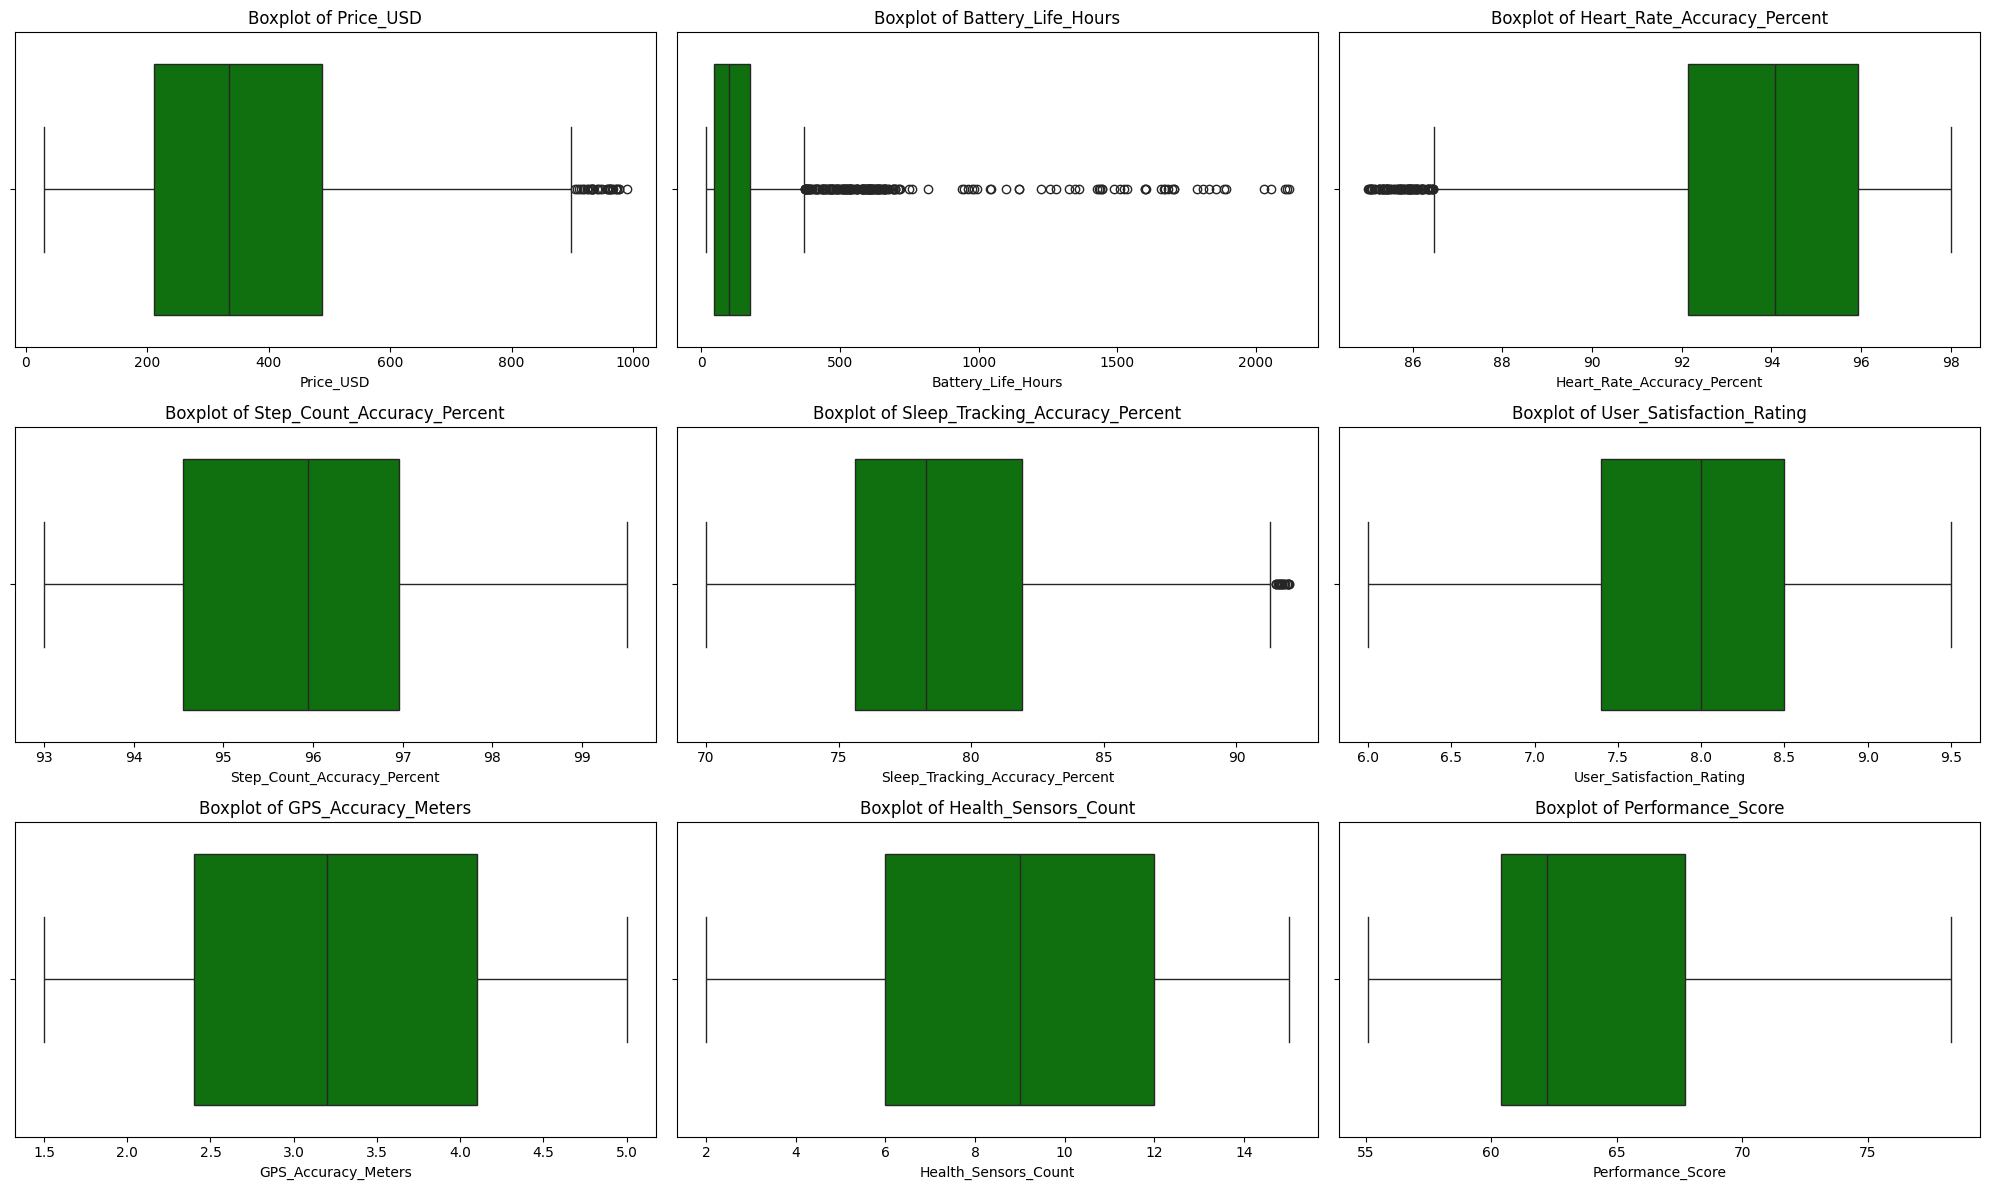

In [ ]:
# Calculating the number of rows needed based on the number of numerical columns
rows = (len(numerical_columns) + 2) // 3 # Calculate rows for a 3-column grid

# Creating a grid for the plots (rows calculated dynamically)
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 4))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Looping through numerical columns and plotting boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], color='green', ax=axes[i]) # Changed color to 'green'
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

Distribution

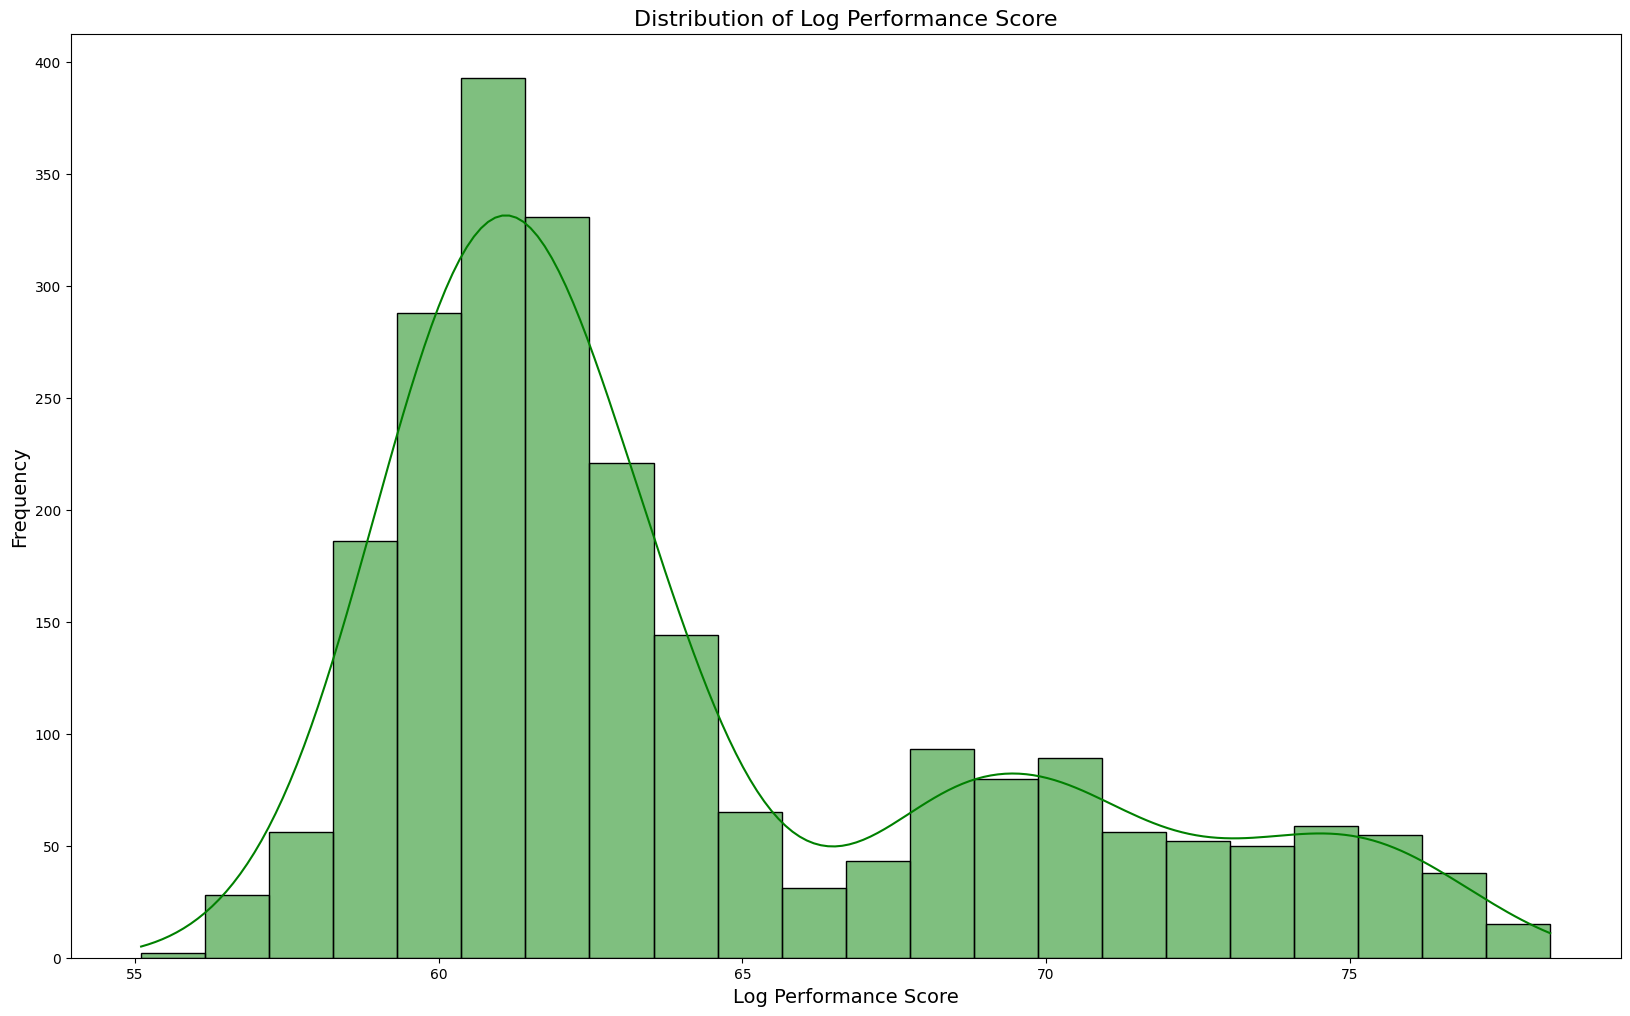

In [ ]:
# Creating a figure
plt.figure(figsize=(20, 12))

# Plotting the histogram with KDE
sns.histplot(data['Performance_Score'], kde=True, color='green')

# Adding title and labels
plt.title('Distribution of Log Performance Score', fontsize=16)
plt.xlabel('Log Performance Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# checking correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
Price_USD,1.000000,0.209961,0.307562,0.419479,0.252863,0.724060,-0.019312,0.347954,-0.077843
Battery_Life_Hours,0.209961,1.000000,-0.010421,0.374328,-0.090342,0.106512,0.005251,-0.152235,0.152343
Heart_Rate_Accuracy_Percent,0.307562,-0.010421,1.000000,0.260780,-0.166951,0.212828,0.016022,0.596657,-0.695394
Step_Count_Accuracy_Percent,0.419479,0.374328,0.260780,1.000000,-0.014998,0.252854,-0.012208,0.261026,-0.171210
Sleep_Tracking_Accuracy_Percent,0.252863,-0.090342,-0.166951,-0.014998,1.000000,0.253049,-0.015465,0.046167,0.353991
User_Satisfaction_Rating,0.724060,0.106512,0.212828,0.252854,0.253049,1.000000,-0.030588,0.263583,0.091507
GPS_Accuracy_Meters,-0.019312,0.005251,0.016022,-0.012208,-0.015465,-0.030588,1.000000,-0.006962,-0.361219
Health_Sensors_Count,0.347954,-0.152235,0.596657,0.261026,0.046167,0.263583,-0.006962,1.000000,-0.616105
Performance_Score,-0.077843,0.152343,-0.695394,-0.171210,0.353991,0.091507,-0.361219,-0.616105,1.000000


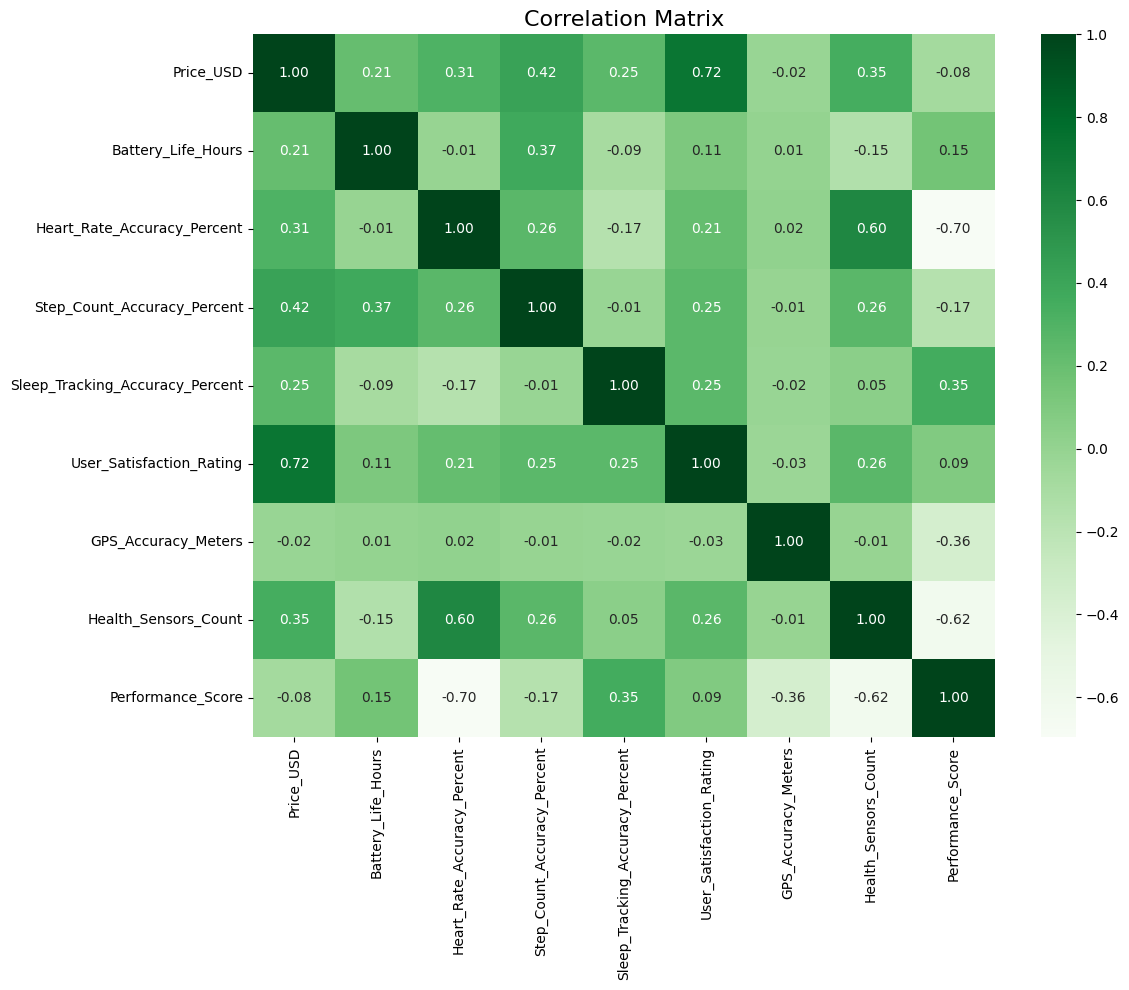

In [ ]:
# Create a figure with the desired size
plt.figure(figsize=(12, 10))

# Plot the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


Step 02: Data Preprocessing

In [ ]:
# checking for missing values
missing_values = data.isnull().sum()
missing_values

,0
Test_Date,0
Device_Name,0
Brand,0
Model,0
Category,0
Price_USD,0
Battery_Life_Hours,0
Heart_Rate_Accuracy_Percent,0
Step_Count_Accuracy_Percent,0
Sleep_Tracking_Accuracy_Percent,0


In [ ]:
# initializing the SimpleImputer with strategy='most_frequent' #MODE IMPUTATION
imputer = SimpleImputer(strategy='most_frequent')

# fitting and transforming the "parental_education_level" column
# extracting the column as a 2D array for SimpleImputer (to deal with the  dimension mismatch)
data_2d = data[['GPS_Accuracy_Meters']]

# applying fit_transform to convert back to 1D array
data['GPS_Accuracy_Meters'] = imputer.fit_transform(data_2d).ravel()

# print the data after imputation
print(data)


       Test_Date              Device_Name    Brand            Model  \
0     2025-06-01         Fitbit Inspire 4   Fitbit        Inspire 4   
1     2025-06-01         Apple Watch SE 3    Apple       Watch SE 3   
2     2025-06-01           Fitbit Versa 4   Fitbit          Versa 4   
3     2025-06-01         Polar Vantage V3    Polar       Vantage V3   
4     2025-06-01  Samsung Galaxy Watch FE  Samsung  Galaxy Watch FE   
...          ...                      ...      ...              ...   
2370  2025-06-25    Apple Watch Series 10    Apple  Watch Series 10   
2371  2025-06-25          Fitbit Charge 6   Fitbit         Charge 6   
2372  2025-06-25         Apple Watch SE 3    Apple       Watch SE 3   
2373  2025-06-25      Apple Watch Ultra 2    Apple    Watch Ultra 2   
2374  2025-06-25            Amazfit GTS 4  Amazfit            GTS 4   

             Category  Price_USD  Battery_Life_Hours  \
0     Fitness Tracker     141.74               129.9   
1          Smartwatch     834.64   

In [ ]:
# checking for any missing values after imputation
data.isnull().sum()

,0
Test_Date,0
Device_Name,0
Brand,0
Model,0
Category,0
Price_USD,0
Battery_Life_Hours,0
Heart_Rate_Accuracy_Percent,0
Step_Count_Accuracy_Percent,0
Sleep_Tracking_Accuracy_Percent,0


In [ ]:
# list of categorical columns in the wearable devices dataset
categorical_cols = [
    'Device_Name',
    'Brand',
    'Model',
    'Category',
    'Water_Resistance_Rating',
    'Connectivity_Features',
    'App_Ecosystem_Support'
]

# Filter categorical_cols to only include columns present in data
present_categorical_cols = [col for col in categorical_cols if col in data.columns]

if not present_categorical_cols:
    print("Warning: No categorical columns found in the DataFrame for encoding. Skipping one-hot encoding.")
    # If no categorical columns are present, all_data will just be the original data
    all_data = data.copy()
else:
    # initializing encoder without handling unknowns (as we already dealt with unknown values previously)
    encoder = OneHotEncoder(sparse_output=False)

    # fit and transform (one-hot encode categorical columns)
    encoded_array = encoder.fit_transform(data[present_categorical_cols])

    # get new column names
    encoded_cols = encoder.get_feature_names_out(present_categorical_cols)

    # convert back to DataFrame (create DataFrame from encoded data)
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=data.index)

    # concatenate with original dataset, dropping only the present categorical columns
    all_data = pd.concat([data.drop(columns=present_categorical_cols), encoded_df], axis=1)

    print("shape before encoding:", data.shape)
    print("shape after encoding:", all_data.shape)

shape before encoding: (2375, 17)
shape after encoding: (2375, 97)


In [ ]:
all_data.head()

,Test_Date,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score,...,Water_Resistance_Rating_IPX4,Water_Resistance_Rating_IPX7,Water_Resistance_Rating_IPX8,Connectivity_Features_Bluetooth,"Connectivity_Features_Bluetooth, WiFi","Connectivity_Features_WiFi, Bluetooth, NFC","Connectivity_Features_WiFi, Bluetooth, NFC, LTE",App_Ecosystem_Support_Android/iOS,App_Ecosystem_Support_Cross-platform,App_Ecosystem_Support_iOS
0,2025-06-01,141.74,129.9,89.69,93.03,78.91,6.5,3.0,5,68.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2025-06-01,834.64,26.5,95.92,98.20,79.76,8.3,4.9,8,60.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2025-06-01,145.34,161.2,92.24,96.81,74.49,6.0,1.7,7,59.3,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2025-06-01,349.53,69.4,96.77,95.56,78.06,8.0,3.2,12,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2025-06-01,502.43,39.7,92.27,98.15,75.23,8.3,1.6,14,61.2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
# List of original categorical columns (before encoding)
categorical_cols = [
    'Device_Name',
    'Brand',
    'Model',
    'Category',
    'Water_Resistance_Rating',
    'Connectivity_Features',
    'App_Ecosystem_Support'
]

# Check the unique categories in the original categorical columns in 'data'
print("Unique categories in original categorical columns (from 'data' DataFrame):")

for col in categorical_cols:
    if col in data.columns:
        print(f"{col} : {data[col].nunique()} categories -> {data[col].unique()[:10]}...")  # Displaying first 10 categories
    else:
        print(f"Warning: Original column '{col}' not found in 'data' DataFrame.")
    print("-" * 50)


Unique categories in original categorical columns (from 'data' DataFrame):
Device_Name : 29 categories -> ['Fitbit Inspire 4' 'Apple Watch SE 3' 'Fitbit Versa 4' 'Polar Vantage V3'
 'Samsung Galaxy Watch FE' 'Garmin Forerunner 965' 'Withings ScanWatch 2'
 'Garmin Fenix 8' 'Samsung Galaxy Watch Ultra' 'WHOOP 4.0']...
--------------------------------------------------
Brand : 10 categories -> ['Fitbit' 'Apple' 'Polar' 'Samsung' 'Garmin' 'Withings' 'WHOOP' 'Oura'
 'Huawei' 'Amazfit']...
--------------------------------------------------
Model : 29 categories -> ['Inspire 4' 'Watch SE 3' 'Versa 4' 'Vantage V3' 'Galaxy Watch FE'
 'Forerunner 965' 'ScanWatch 2' 'Fenix 8' 'Galaxy Watch Ultra' '4.0']...
--------------------------------------------------
Category : 5 categories -> ['Fitness Tracker' 'Smartwatch' 'Sports Watch' 'Fitness Band' 'Smart Ring']...
--------------------------------------------------
Water_Resistance_Rating : 7 categories -> ['3ATM' 'IP68' 'IPX8' '5ATM' 'IPX4' 'IPX7' '1

In [ ]:
# 1. See how many categories each categorical column has
categorical_cols = [
    'Device_Name',
    'Brand',
    'Model',
    'Category',
    'Water_Resistance_Rating',
    'Connectivity_Features',
    'App_Ecosystem_Support'
]

# The 'data' DataFrame has been transformed and no longer contains the original categorical columns.
# This is evidenced by the KeyError.
# The original categorical columns were dropped during the one-hot encoding process in a prior cell.

print("Current columns in 'data' DataFrame:")
print(data.columns.tolist())
print("\nCannot check unique categories of original categorical columns directly from 'data' as they are no longer present.")
print("To view these, you would need to reload the original dataset or inspect the 'all_data' DataFrame for the encoded features.")

# The following loop would cause a KeyError as the columns no longer exist in 'data':
# for col in categorical_cols:
#     print(col, "->", data[col].nunique(), "categories")
#     print(data[col].unique())
#     print("-" * 50)

Current columns in 'data' DataFrame:
['Test_Date', 'Device_Name', 'Brand', 'Model', 'Category', 'Price_USD', 'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent', 'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent', 'Water_Resistance_Rating', 'User_Satisfaction_Rating', 'GPS_Accuracy_Meters', 'Connectivity_Features', 'Health_Sensors_Count', 'App_Ecosystem_Support', 'Performance_Score']

Cannot check unique categories of original categorical columns directly from 'data' as they are no longer present.
To view these, you would need to reload the original dataset or inspect the 'all_data' DataFrame for the encoded features.


In [59]:
len(all_data.columns)

97

In [60]:
all_data.describe()

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score,Device_Name_Amazfit Band 7,...,Water_Resistance_Rating_IPX4,Water_Resistance_Rating_IPX7,Water_Resistance_Rating_IPX8,Connectivity_Features_Bluetooth,"Connectivity_Features_Bluetooth, WiFi","Connectivity_Features_WiFi, Bluetooth, NFC","Connectivity_Features_WiFi, Bluetooth, NFC, LTE",App_Ecosystem_Support_Android/iOS,App_Ecosystem_Support_Cross-platform,App_Ecosystem_Support_iOS
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,...,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.181768,8.912842,64.047621,0.022737,...,0.066526,0.107789,0.273263,0.381474,0.100632,0.258105,0.259789,0.342316,0.549474,0.108211
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,0.882976,3.559990,5.109075,0.149095,...,0.249252,0.310180,0.445729,0.485851,0.300904,0.437684,0.438611,0.474585,0.497651,0.310712
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.700000,6.000000,60.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.000000,9.000000,62.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,3.800000,12.000000,67.700000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# checking null values
all_data.isnull().values.any()

np.False_

In [62]:
# checking for missing values
missing_values = all_data.isnull().sum()
missing_values

,0
Test_Date,0
Price_USD,0
Battery_Life_Hours,0
Heart_Rate_Accuracy_Percent,0
Step_Count_Accuracy_Percent,0
...,...
"Connectivity_Features_WiFi, Bluetooth, NFC",0
"Connectivity_Features_WiFi, Bluetooth, NFC, LTE",0
App_Ecosystem_Support_Android/iOS,0
App_Ecosystem_Support_Cross-platform,0


In [63]:
pd.set_option('display.max_columns', None)  # Display all columns
print(missing_values)

Test_Date                                          0
Price_USD                                          0
Battery_Life_Hours                                 0
Heart_Rate_Accuracy_Percent                        0
Step_Count_Accuracy_Percent                        0
                                                  ..
Connectivity_Features_WiFi, Bluetooth, NFC         0
Connectivity_Features_WiFi, Bluetooth, NFC, LTE    0
App_Ecosystem_Support_Android/iOS                  0
App_Ecosystem_Support_Cross-platform               0
App_Ecosystem_Support_iOS                          0
Length: 97, dtype: int64


In [64]:
# Check for missing values in only a subset of columns (if you have many columns)
print(all_data.iloc[:, :20].isnull().sum())  # First 20 columns


Test_Date                            0
Price_USD                            0
Battery_Life_Hours                   0
Heart_Rate_Accuracy_Percent          0
Step_Count_Accuracy_Percent          0
Sleep_Tracking_Accuracy_Percent      0
User_Satisfaction_Rating             0
GPS_Accuracy_Meters                  0
Health_Sensors_Count                 0
Performance_Score                    0
Device_Name_Amazfit Band 7           0
Device_Name_Amazfit GTR 4            0
Device_Name_Amazfit GTS 4            0
Device_Name_Amazfit T-Rex 3          0
Device_Name_Apple Watch SE 3         0
Device_Name_Apple Watch Series 10    0
Device_Name_Apple Watch Ultra 2      0
Device_Name_Fitbit Charge 6          0
Device_Name_Fitbit Inspire 4         0
Device_Name_Fitbit Sense 2           0
dtype: int64


In [66]:
correlation_matrix

,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
Price_USD,1.000000,0.209961,0.307562,0.419479,0.252863,0.724060,-0.019312,0.347954,-0.077843
Battery_Life_Hours,0.209961,1.000000,-0.010421,0.374328,-0.090342,0.106512,0.005251,-0.152235,0.152343
Heart_Rate_Accuracy_Percent,0.307562,-0.010421,1.000000,0.260780,-0.166951,0.212828,0.016022,0.596657,-0.695394
Step_Count_Accuracy_Percent,0.419479,0.374328,0.260780,1.000000,-0.014998,0.252854,-0.012208,0.261026,-0.171210
Sleep_Tracking_Accuracy_Percent,0.252863,-0.090342,-0.166951,-0.014998,1.000000,0.253049,-0.015465,0.046167,0.353991
User_Satisfaction_Rating,0.724060,0.106512,0.212828,0.252854,0.253049,1.000000,-0.030588,0.263583,0.091507
GPS_Accuracy_Meters,-0.019312,0.005251,0.016022,-0.012208,-0.015465,-0.030588,1.000000,-0.006962,-0.361219
Health_Sensors_Count,0.347954,-0.152235,0.596657,0.261026,0.046167,0.263583,-0.006962,1.000000,-0.616105
Performance_Score,-0.077843,0.152343,-0.695394,-0.171210,0.353991,0.091507,-0.361219,-0.616105,1.000000


In [67]:
pd.set_option('display.max_columns', None)
display(all_data.head())
pd.reset_option('display.max_columns')

,Test_Date,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score,Device_Name_Amazfit Band 7,Device_Name_Amazfit GTR 4,Device_Name_Amazfit GTS 4,Device_Name_Amazfit T-Rex 3,Device_Name_Apple Watch SE 3,Device_Name_Apple Watch Series 10,Device_Name_Apple Watch Ultra 2,Device_Name_Fitbit Charge 6,Device_Name_Fitbit Inspire 4,Device_Name_Fitbit Sense 2,Device_Name_Fitbit Versa 4,Device_Name_Garmin Enduro 3,Device_Name_Garmin Fenix 8,Device_Name_Garmin Forerunner 965,Device_Name_Garmin Instinct 2X,Device_Name_Garmin Venu 3,Device_Name_Huawei Band 9,Device_Name_Huawei Watch 5,Device_Name_Huawei Watch GT 5,Device_Name_Huawei Watch Ultimate,Device_Name_Oura Ring Gen 4,Device_Name_Polar Pacer Pro,Device_Name_Polar Vantage V3,Device_Name_Samsung Galaxy Watch 7,Device_Name_Samsung Galaxy Watch FE,Device_Name_Samsung Galaxy Watch Ultra,Device_Name_WHOOP 4.0,Device_Name_Withings ScanWatch 2,Device_Name_Withings Steel HR,Brand_Amazfit,Brand_Apple,Brand_Fitbit,Brand_Garmin,Brand_Huawei,Brand_Oura,Brand_Polar,Brand_Samsung,Brand_WHOOP,Brand_Withings,Model_4.0,Model_Band 7,Model_Band 9,Model_Charge 6,Model_Enduro 3,Model_Fenix 8,Model_Forerunner 965,Model_GTR 4,Model_GTS 4,Model_Galaxy Watch 7,Model_Galaxy Watch FE,Model_Galaxy Watch Ultra,Model_Inspire 4,Model_Instinct 2X,Model_Pacer Pro,Model_Ring Gen 4,Model_ScanWatch 2,Model_Sense 2,Model_Steel HR,Model_T-Rex 3,Model_Vantage V3,Model_Venu 3,Model_Versa 4,Model_Watch 5,Model_Watch GT 5,Model_Watch SE 3,Model_Watch Series 10,Model_Watch Ultimate,Model_Watch Ultra 2,Category_Fitness Band,Category_Fitness Tracker,Category_Smart Ring,Category_Smartwatch,Category_Sports Watch,Water_Resistance_Rating_10ATM,Water_Resistance_Rating_3ATM,Water_Resistance_Rating_5ATM,Water_Resistance_Rating_IP68,Water_Resistance_Rating_IPX4,Water_Resistance_Rating_IPX7,Water_Resistance_Rating_IPX8,Connectivity_Features_Bluetooth,"Connectivity_Features_Bluetooth, WiFi","Connectivity_Features_WiFi, Bluetooth, NFC","Connectivity_Features_WiFi, Bluetooth, NFC, LTE",App_Ecosystem_Support_Android/iOS,App_Ecosystem_Support_Cross-platform,App_Ecosystem_Support_iOS
0,2025-06-01,141.74,129.9,89.69,93.03,78.91,6.5,3.0,5,68.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2025-06-01,834.64,26.5,95.92,98.20,79.76,8.3,4.9,8,60.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2025-06-01,145.34,161.2,92.24,96.81,74.49,6.0,1.7,7,59.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2025-06-01,349.53,69.4,96.77,95.56,78.06,8.0,3.2,12,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2025-06-01,502.43,39.7,92.27,98.15,75.23,8.3,1.6,14,61.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

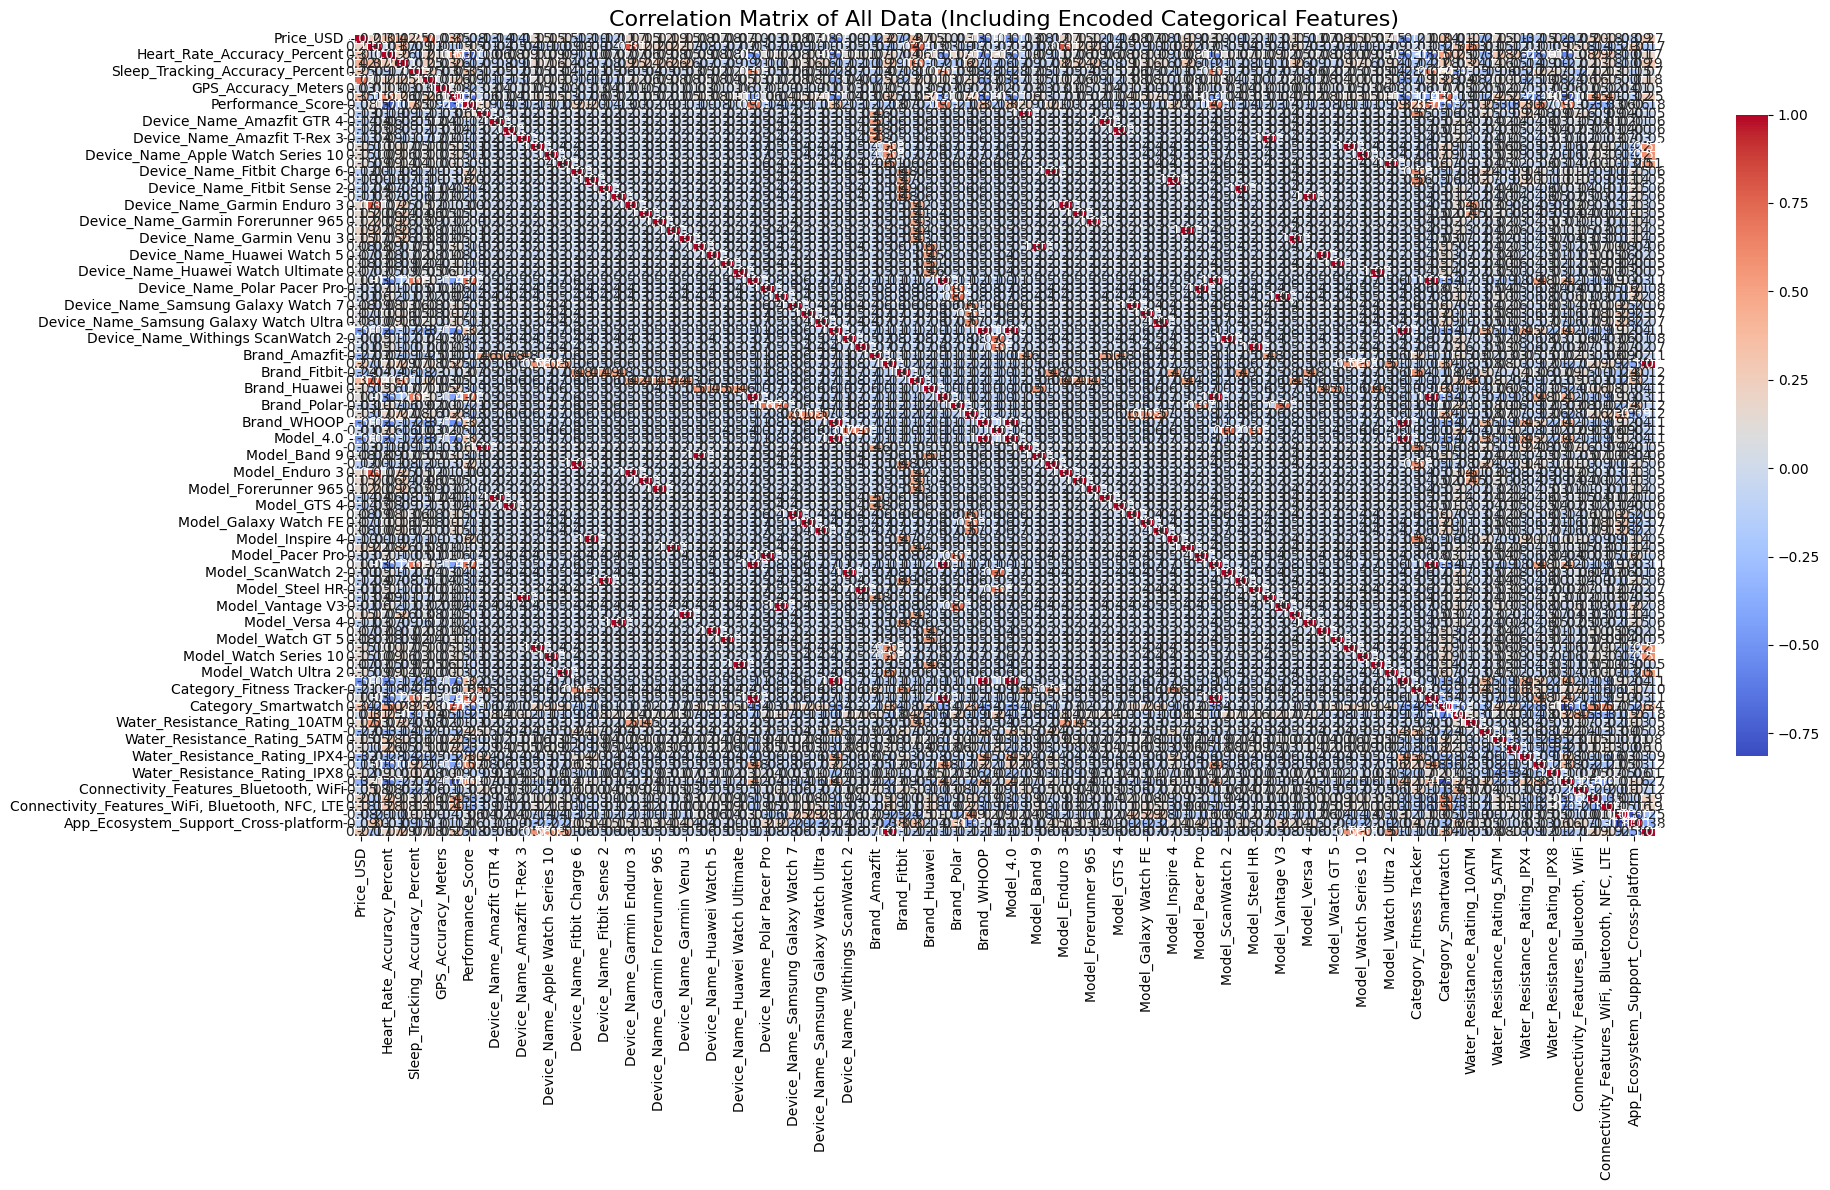

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `all_data` is the DataFrame with your features (including encoded categorical ones)
# Exclude 'Test_Date' as it's a string and not relevant for numerical correlation
correlation_matrix = all_data.drop(columns=['Test_Date']).corr()  # Compute correlation matrix, excluding 'Test_Date'

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of All Data (Including Encoded Categorical Features)', fontsize=16)
plt.tight_layout()
plt.show()

#here lots of colums except testdate

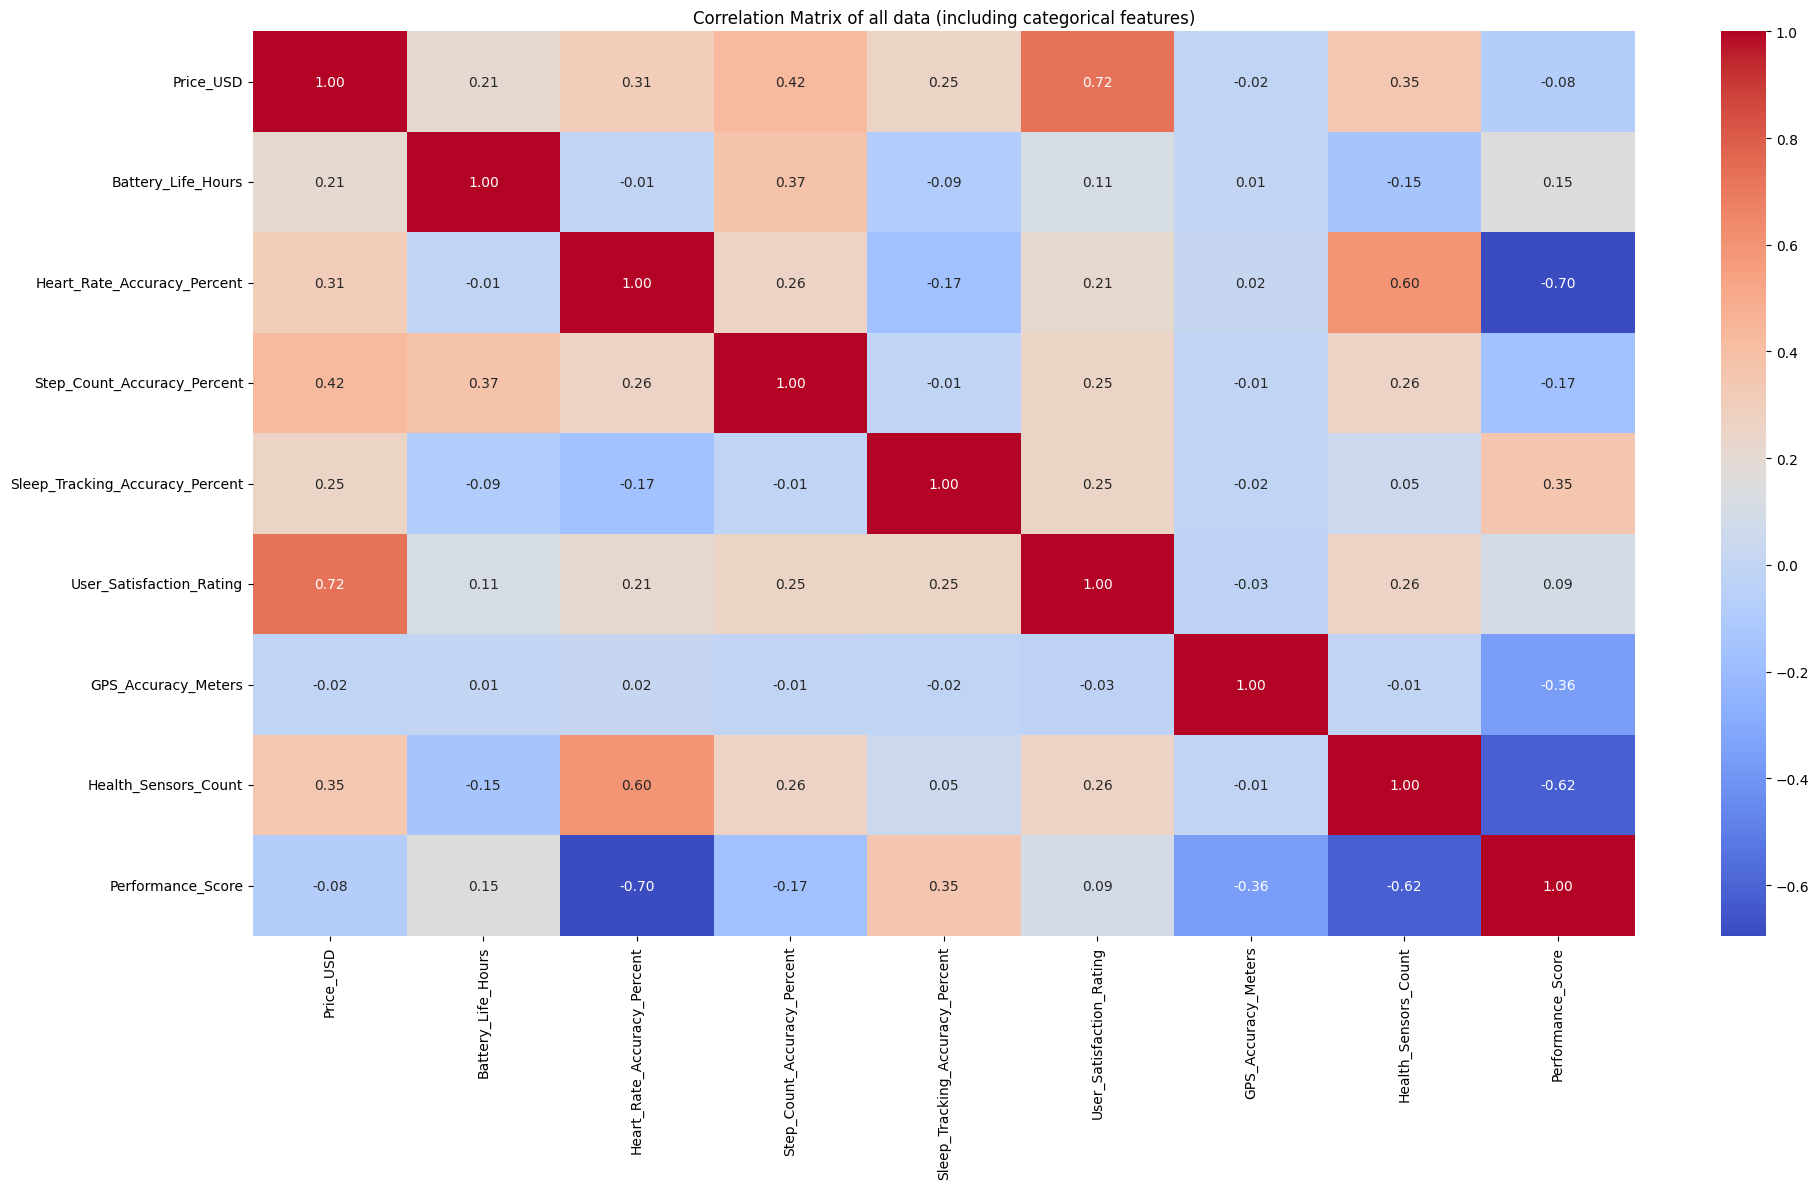

In [68]:
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of all data (including categorical features)')
plt.tight_layout()
plt.show()

#here due to lots of columns it is like this

In [71]:
# Export DataFrame to CSV
all_data.to_csv('device.csv', index=False)  # index=False prevents pandas from writing row indices (saves the dataset to a CSV file with only the data, no extra row numbers)

Step 03: Feature Selection

In [72]:
# Preparing the features (X) and target (y)
X = all_data.drop(columns=['Test_Date', 'Performance_Score'])
y = all_data['Performance_Score']

In [73]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2375, 95)
Shape of y: (2375,)


Step 04:  Normalizing the data using StandardScaler

In [74]:
# Normalizing using StandardScaler
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)   # scaling is applied only to X

Step 05: Splitting the data into training and testing sets (80-20 split)

In [75]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_array, y, test_size=0.2, random_state=42
)


Step 06: Applying Different Models

In [76]:
# Dictionary to store results
results = {}

# 1. Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results["Random Forest"] = [
    mean_absolute_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_rf),
    np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    mean_absolute_percentage_error(y_test, y_pred_rf),
    r2_score(y_test, y_pred_rf)
]

# 2. XGBoost
xgb_model = XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results["XGBoost"] = [
    mean_absolute_error(y_test, y_pred_xgb),
    mean_squared_error(y_test, y_pred_xgb),
    np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    mean_absolute_percentage_error(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_xgb)
]

# 3. Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results["Decision Tree"] = [
    mean_absolute_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_dt),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    mean_absolute_percentage_error(y_test, y_pred_dt),
    r2_score(y_test, y_pred_dt)
]

# 4. Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results["SVR"] = [
    mean_absolute_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_svr),
    np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    mean_absolute_percentage_error(y_test, y_pred_svr),
    r2_score(y_test, y_pred_svr)
]


# Results Table

results_df = pd.DataFrame(
    results,
    index=["MAE", "MSE", "RMSE", "MAPE", "R²"]
).T

print(results_df)

                    MAE       MSE      RMSE      MAPE        R²
Random Forest  0.327928  0.178625  0.422641  0.005184  0.992335
XGBoost        0.203375  0.070515  0.265546  0.003203  0.996974
Decision Tree  0.562737  0.525621  0.724997  0.008913  0.977444
SVR            0.430535  0.358716  0.598929  0.006822  0.984606


Step 07: Making Predictions and Evaluating the Models

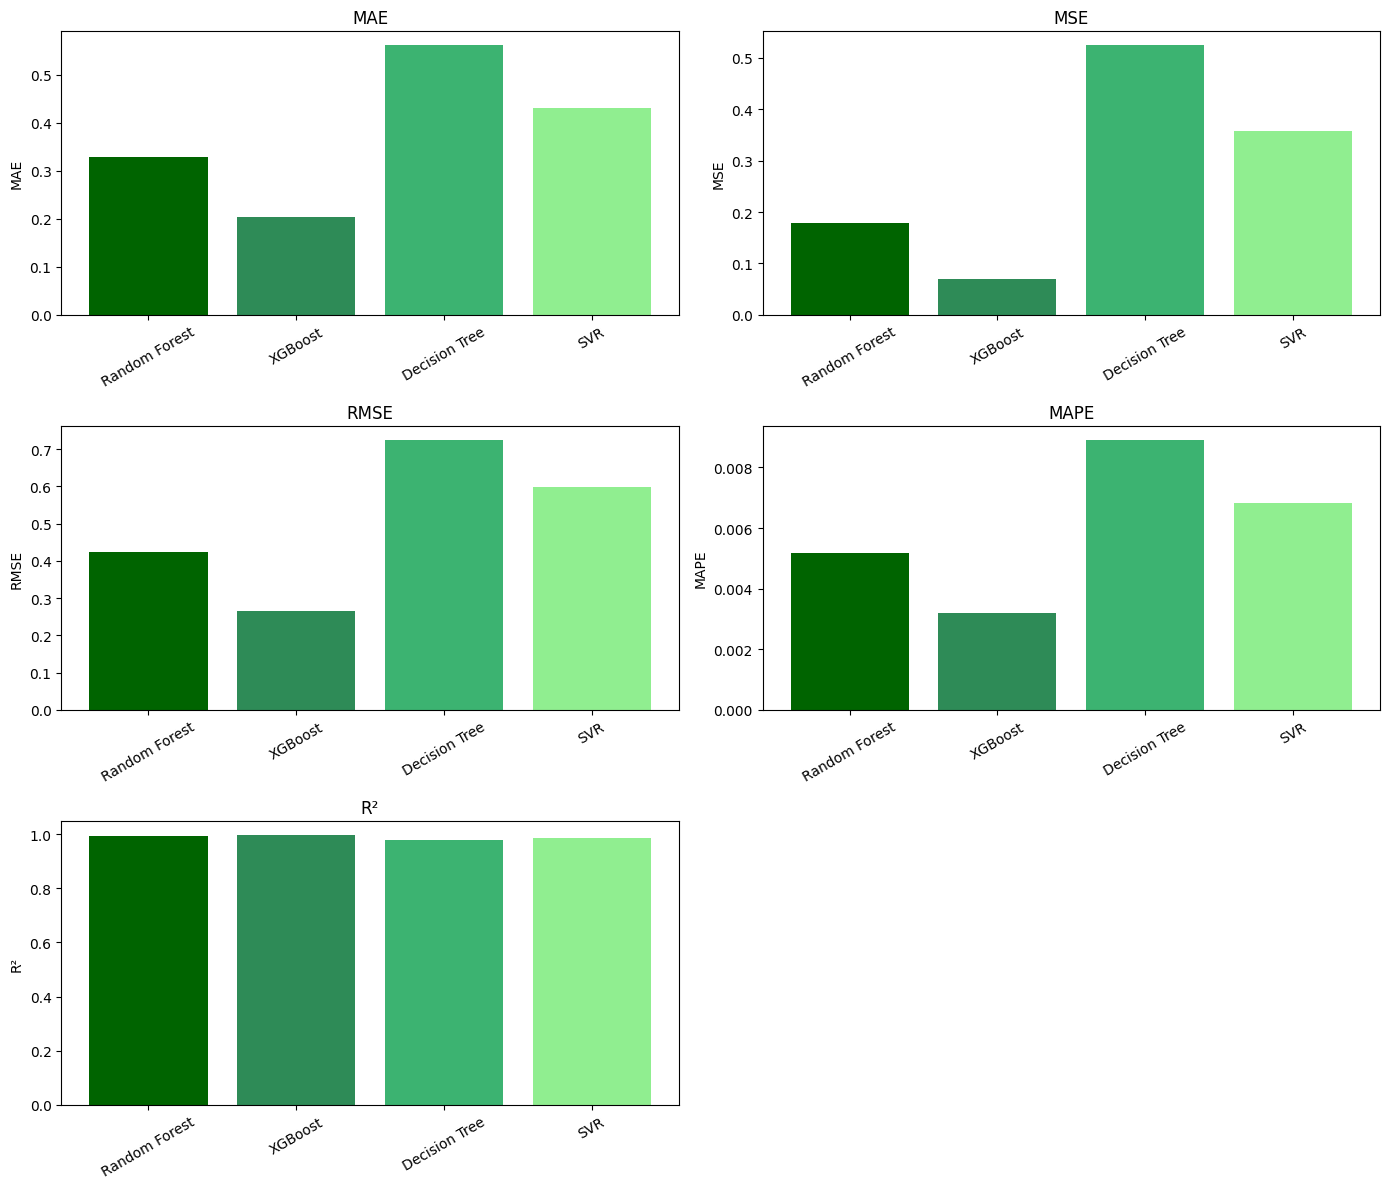

In [77]:
# Models and metrics from your results_df
models = results_df.index.tolist()

mae  = results_df["MAE"].tolist()
mse  = results_df["MSE"].tolist()
rmse = results_df["RMSE"].tolist()
mape = results_df["MAPE"].tolist()
r2   = results_df["R²"].tolist()

metrics = {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R²": r2}

# Plot grouped bar charts
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

green_colors = ["darkgreen", "seagreen", "mediumseagreen", "lightgreen"]

for i, (metric, values) in enumerate(metrics.items()):
    x_pos = range(len(models))
    axes[i].bar(
        x_pos,
        values,
        color=green_colors
    )
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(models, rotation=30)

# remove unused subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Optimization of XGBoost

In [78]:
from sklearn.model_selection import RandomizedSearchCV

#  Optimizing XGBoost

xgb = XGBRegressor(random_state=42, objective="reg:squarederror")

param_dist_xgb = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6, 8],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=15,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit search
random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_
print("Best XGBoost parameters:", random_search_xgb.best_params_)

# Predict on test set
y_pred_xgb_opt = best_xgb.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_xgb_opt)
mse = mean_squared_error(y_test, y_pred_xgb_opt)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb_opt)
r2 = r2_score(y_test, y_pred_xgb_opt)

print(f"\nOptimized XGBoost Test MAE:  {mae:.4f}")
print(f"Optimized XGBoost Test MSE:  {mse:.4f}")
print(f"Optimized XGBoost Test RMSE: {rmse:.4f}")
print(f"Optimized XGBoost Test MAPE:{mape:.4f}")
print(f"Optimized XGBoost Test R²:   {r2:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best XGBoost parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}

Optimized XGBoost Test MAE:  0.1866
Optimized XGBoost Test MSE:  0.0695
Optimized XGBoost Test RMSE: 0.2637
Optimized XGBoost Test MAPE:0.0029
Optimized XGBoost Test R²:   0.9970


Optimizing Random Forest

In [79]:
#Optimizing Random Forest (Wearable Devices Project)

# Base model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter search space
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized search
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on your training data
random_search_rf.fit(X_train, y_train)

# Best model
best_rf = random_search_rf.best_estimator_
print("Best Random Forest parameters:", random_search_rf.best_params_)

# Predictions on test set
y_pred_rf_opt = best_rf.predict(X_test)

# Metrics
mae_rf  = mean_absolute_error(y_test, y_pred_rf_opt)
mse_rf  = mean_squared_error(y_test, y_pred_rf_opt)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf_opt)
r2_rf   = r2_score(y_test, y_pred_rf_opt)

print(f"\nOptimized Random Forest Test MAE:  {mae_rf:.4f}")
print(f"Optimized Random Forest Test MSE:  {mse_rf:.4f}")
print(f"Optimized Random Forest Test RMSE: {rmse_rf:.4f}")
print(f"Optimized Random Forest Test MAPE:{mape_rf:.4f}")
print(f"Optimized Random Forest Test R²:   {r2_rf:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Random Forest parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}

Optimized Random Forest Test MAE:  0.6955
Optimized Random Forest Test MSE:  0.7707
Optimized Random Forest Test RMSE: 0.8779
Optimized Random Forest Test MAPE:0.0109
Optimized Random Forest Test R²:   0.9669


Optimizing Decision Tree

In [80]:



# Base Decision Tree model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter grid for Decision Tree
param_dist_dt = {
    "max_depth": [None, 5, 10, 15, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": [None, "sqrt", "log2"]
}

# Randomized search
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=15,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit search on training data
random_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt = random_search_dt.best_estimator_
print("Best Decision Tree parameters:", random_search_dt.best_params_)

# Predict on test set
y_pred_dt = best_dt.predict(X_test)

# Evaluate performance
mae_dt  = mean_absolute_error(y_test, y_pred_dt)
mse_dt  = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt   = r2_score(y_test, y_pred_dt)

print(f"\nDecision Tree Test MAE:  {mae_dt:.4f}")
print(f"Decision Tree Test MSE:  {mse_dt:.4f}")
print(f"Decision Tree Test RMSE: {rmse_dt:.4f}")
print(f"Decision Tree Test MAPE:{mape_dt:.4f}")
print(f"Decision Tree Test R²:   {r2_dt:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Decision Tree parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}

Decision Tree Test MAE:  0.5590
Decision Tree Test MSE:  0.5022
Decision Tree Test RMSE: 0.7086
Decision Tree Test MAPE:0.0088
Decision Tree Test R²:   0.9785


Optimizing SVR

In [81]:
# Base SVR model
svr = SVR()

# Hyperparameter grid for SVR
param_dist_svr = {
    "kernel": ["rbf", "poly", "linear"],
    "C": [0.1, 1, 10, 50, 100],
    "epsilon": [0.001, 0.01, 0.1, 0.2],
    "gamma": ["scale", "auto"]
}

# Randomized search
random_search_svr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist_svr,
    n_iter=5, # Reduced n_iter to speed up execution
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit search on training data
random_search_svr.fit(X_train, y_train)

# Best SVR model
best_svr = random_search_svr.best_estimator_
print("Best SVR parameters:", random_search_svr.best_params_)

# Predict on test set
y_pred_svr = best_svr.predict(X_test)

# Evaluate performance
mae_svr  = mean_absolute_error(y_test, y_pred_svr)
mse_svr  = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr   = r2_score(y_test, y_pred_svr)

print(f"\nSVR Test MAE:  {mae_svr:.4f}")
print(f"SVR Test MSE:  {mse_svr:.4f}")
print(f"SVR Test RMSE: {rmse_svr:.4f}")
print(f"SVR Test MAPE:{mape_svr:.4f}")
print(f"SVR Test R²:   {r2_svr:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best SVR parameters: {'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.01, 'C': 10}

SVR Test MAE:  0.2955
SVR Test MSE:  0.1529
SVR Test RMSE: 0.3910
SVR Test MAPE:0.0047
SVR Test R²:   0.9934


Showing All the results together

,MAE,MSE,RMSE,MAPE,R²
Random Forest,0.695451,0.770688,0.877889,0.010948,0.966927
XGBoost,0.186552,0.069528,0.263682,0.002927,0.997016
Decision Tree,0.559030,0.502160,0.708633,0.008840,0.978451
SVR,0.295507,0.152859,0.390971,0.004732,0.993440


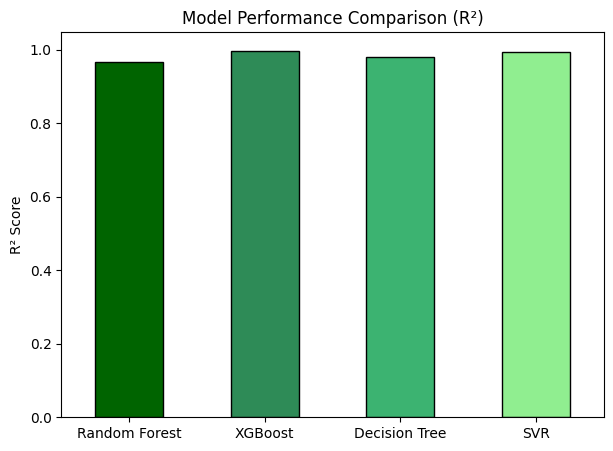

In [82]:
# Results dictionary with optimized models
results = {
    "Random Forest": {
        "MAE": mae_rf,
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "MAPE": mape_rf,
        "R²": r2_rf,
    },
    "XGBoost": {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R²": r2,
    },
    "Decision Tree": {
        "MAE": mae_dt,
        "MSE": mse_dt,
        "RMSE": rmse_dt,
        "MAPE": mape_dt,
        "R²": r2_dt,
    },
    "SVR": {
        "MAE": mae_svr,
        "MSE": mse_svr,
        "RMSE": rmse_svr,
        "MAPE": mape_svr,
        "R²": r2_svr,
    }
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T

# Display table
display(df_results)

# Plot comparison (R² only) with GREEN colors
green_colors = ["darkgreen", "seagreen", "mediumseagreen", "lightgreen"]

df_results["R²"].plot(
    kind="bar",
    figsize=(7, 5),
    color=green_colors,
    edgecolor="black"
)

plt.title("Model Performance Comparison (R²)")
plt.ylabel("R² Score")
plt.xticks(rotation=0)
plt.show()

Top 10 most Important features

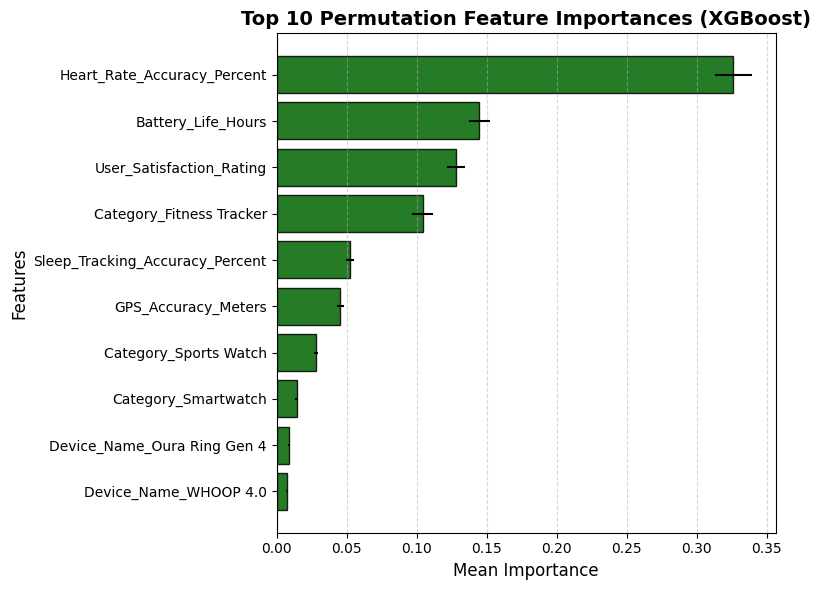

,Feature,Mean Importance,Std Dev
0,Heart_Rate_Accuracy_Percent,0.326079,0.013289
1,Battery_Life_Hours,0.144699,0.007467
2,User_Satisfaction_Rating,0.127907,0.006486
3,Category_Fitness Tracker,0.104244,0.007362
4,Sleep_Tracking_Accuracy_Percent,0.052189,0.002953
5,GPS_Accuracy_Meters,0.045310,0.002451
6,Category_Sports Watch,0.028231,0.001597
7,Category_Smartwatch,0.014180,0.000789
8,Device_Name_Oura Ring Gen 4,0.009015,0.000627
9,Device_Name_WHOOP 4.0,0.007064,0.000531


In [83]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# feature names from your training data
feature_names = X.columns

# permutation importance for best XGBoost model
perm_importance = permutation_importance(
    best_xgb,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

# sort features by importance
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]

#  TOP 10 FEATURES ONLY
top_n = 10
top_idx = sorted_idx[:top_n]
top_features = feature_names[top_idx]
top_importances = perm_importance.importances_mean[top_idx]
top_std = perm_importance.importances_std[top_idx]

#  Plot horizontal bar chart (top 10 only)
plt.figure(figsize=(8, 6))
plt.barh(
    top_features,
    top_importances,
    xerr=top_std,
    color="darkgreen",
    edgecolor="black",
    alpha=0.85
)
plt.gca().invert_yaxis()
plt.title("Top 10 Permutation Feature Importances (XGBoost)", fontsize=14, weight="bold")
plt.xlabel("Mean Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Nice table of top 10 features
importance_df = pd.DataFrame({
    "Feature": top_features,
    "Mean Importance": top_importances,
    "Std Dev": top_std
})

display(
    importance_df
    .reset_index(drop=True)
    .style.background_gradient(cmap="Greens", subset=["Mean Importance"])
)


Linear Regression Visualization

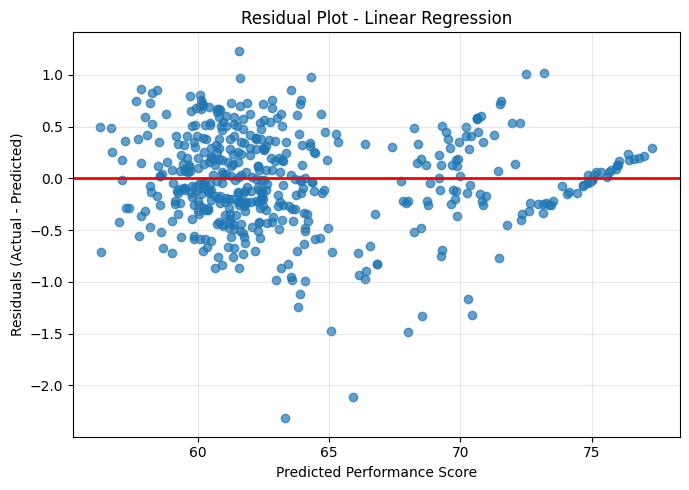

In [84]:
# 1. Train Linear Regression on your data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on test set
y_pred_lr = lr_model.predict(X_test)

# 3. Compute residuals
residuals = y_test - y_pred_lr

# 4. Residual Plot (Linear Regression)
plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr, residuals, alpha=0.7)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted Performance Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Linear Regression")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

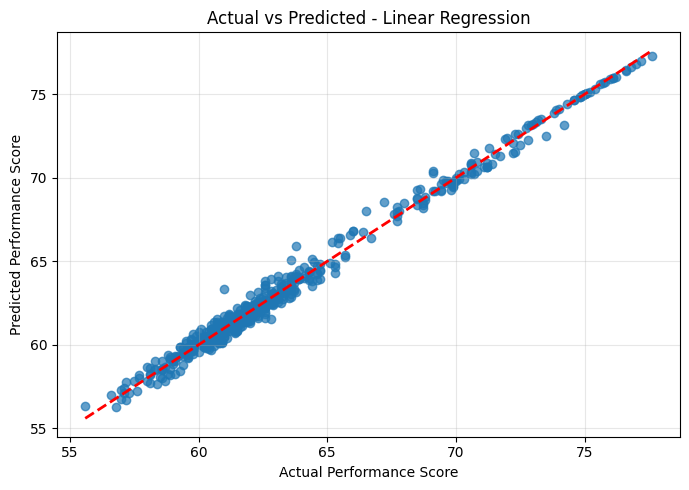

In [85]:
# Actual vs Predicted - Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7)

# 45-degree reference line
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Helper: evaluate model with MAE, RMSE, R²

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


# Predictions from your models
# (these should already be computed earlier)
# y_pred_lr     -> Linear Regression
# y_pred_rf     -> Optimized Random Forest
# y_pred_xgb    -> Optimized XGBoost
# y_pred_dt     -> Optimized Decision Tree
# y_pred_svr    -> Optimized SVR

model_preds = {
    "Linear Regression": y_pred_lr,
    "Random Forest (Optimized)": y_pred_rf,
    "XGBoost (Optimized)": y_pred_xgb,
    "Decision Tree (Optimized)": y_pred_dt,
    "SVR (Optimized)": y_pred_svr
}


# Build Model Comparison Table

rows = []
for name, y_hat in model_preds.items():
    mae, rmse, r2 = evaluate_model(y_test, y_hat)
    rows.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

results = pd.DataFrame(rows)

# Optional: sort by best R² (descending)
results = results.sort_values(by="R²", ascending=False).reset_index(drop=True)

print("\nModel Comparison Table:")
print(results)

# Optional: prettier display in notebooks
display(results.style.background_gradient(cmap="Greens", subset=["R²"]))



Model Comparison Table:
                       Model       MAE      RMSE        R²
0        XGBoost (Optimized)  0.203375  0.265546  0.996974
1            SVR (Optimized)  0.295507  0.390971  0.993440
2  Random Forest (Optimized)  0.327928  0.422641  0.992335
3          Linear Regression  0.361503  0.467128  0.990636
4  Decision Tree (Optimized)  0.559030  0.708633  0.978451


,Model,MAE,RMSE,R²
0,XGBoost (Optimized),0.203375,0.265546,0.996974
1,SVR (Optimized),0.295507,0.390971,0.993440
2,Random Forest (Optimized),0.327928,0.422641,0.992335
3,Linear Regression,0.361503,0.467128,0.990636
4,Decision Tree (Optimized),0.559030,0.708633,0.978451


Wearable health devices differ widely in performance due to variations in sensor accuracy, battery life, connectivity, build quality, and user experience. This project aims to predict the performance score of wearable health devices using machine-learning regression models trained on device-level features from a Kaggle dataset. Models such as Linear Regression, Decision Tree, Random Forest, SVR, and XGBoost are developed and optimized, and their accuracy is evaluated using MAE, RMSE, MAPE, and R². The project also identifies which device features most strongly influence performance, helping consumers and manufacturers better understand what drives high-quality wearable technology.